<a href="https://colab.research.google.com/github/shbnm93/Data-Science-Projects/blob/main/lego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Today we're going to be diving deep into a dataset all about LEGO, which will help us answer a whole bunch of interesting questions about the history of the company, their product offering, and which LEGO set rules them all:

What is the most enormous LEGO set ever created and how many parts did it have?

In which year were the first LEGO sets released and how many sets did the company sell when it first launched?

Which LEGO theme has the most sets? Is it Harry Potter, Ninjago, Friends or something else?

When did the LEGO company really take-off based on its product offering? How many themes and sets did it release every year?

Did LEGO sets grow in size and complexity over time? Do older LEGO sets tend to have more or fewer parts than newer sets?


<img src="https://assets-prd.ignimgs.com/2022/08/24/lego-button-2-1661351794140.jpg">


#Import Statements

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
colors  = pd.read_csv('/content/data/colors.csv')

In [ ]:
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [ ]:
#how many different colors does the LEGO company produce?
colors['name'].nunique()
#This shows us that there are 135 unique colours for LEGO blocks.

135

In [ ]:
#Find the number of transparent colours
colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [ ]:
#we select the column (here with the .dot notation) and call the method.
#The .value_counts() method is a very quick way of finding the number of members of each category.
colors.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

###Understanding LEGO Themes vs.LEGO Sets

walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.
<img src="https://i.imgur.com/aKcwkSx.png">


A lego **set** is a particular box of LEGO or product. Therefore, a singal theme typically has many different sets.
<img src="https://m.media-amazon.com/images/I/81aTQPmoQ6L.jpg">

In [ ]:
sets  = pd.read_csv('/content/data/sets.csv')

In [ ]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [ ]:
sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


In [ ]:
#in which year were the first LEGO sets released and what were these sets called?
sets.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [ ]:
#how many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?
sets[sets['year'] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


Back in 1949, LEGO got started selling only 5 different sets! Note that here we are filtering our DataFrame on a condition. We are retrieving the rows where the year column has the value 1949: sets['year'] == 1949.



In [ ]:
#Now let's find the LEGO set with the largest number of parts. If we want to find the largest number of parts,
#then we have to set the ascending argument to False when we sort by the num_parts column.
#find the top 5 LEGO sets with the most number of parts.
sets.sort_values('num_parts', ascending = False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


The largest LEGO set ever produced has around 10,000 pieces! Apparently, only two of these boxes were ever produced, so if you wanted to get your hands on a ridiculously large LEGO set, you'll have to settle for the 7,541 piece Millennium Falcon.

Now let's take a look at how many sets the LEGO company has published year-on-year. This might tell us something about how LEGO's product offering has changed over time.

First, let's import Matplotlib so we can visualise our findings up top:



In [ ]:
import matplotlib.pyplot as plt

Now, let's create a new Series called sets_by_year which has the years as the index and the number of sets as the value.

The trick is grouping the data by the year and counting the number of entries for that year.



In [ ]:
sets_by_year = sets.groupby('year').count()
sets_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

In [ ]:
sets_by_year['set_num'].tail()

year
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, dtype: int64

From this, we can see that LEGO published less than 10 different sets per year during its first few years of operation. But by 2019 the company had grown spectacularly, releasing 840 sets in that year alone!


You also notice that there is an entry for 2021. The .csv file is from late 2020, so it appears that it already includes some sets on a forward-looking basis. We'll have to take this into account for our charts:

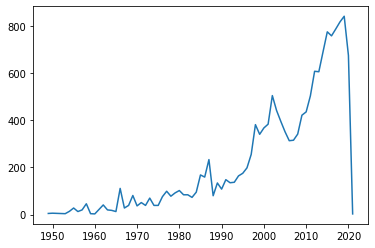

In [ ]:
plt.plot(sets_by_year.index, sets_by_year.set_num)

If we don't exclude the last two years we get a dramatic drop at the end of the chart. This is quite misleading as it suggests LEGO is in big trouble! Given the dataset does not include a full calendar year for 2020, it's best to exclude the last two rows to get a better picture:

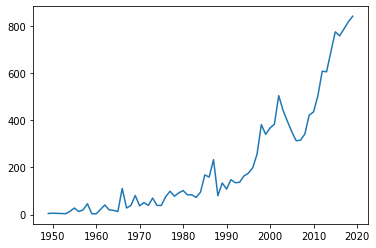

In [ ]:
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])